#### Paracode

Laster ned moduler og filer, `module_update`, `nbtext` og `graph_networkx_louvain`

In [8]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [9]:
from module_update import update, css, code_toggle, printmd
update('nbtext', overwrite=True)
update('graph_networkx_louvain', overwrite=True)

Updated file `C:\Users\larsj\Documents\GitHub\xmining\nbtext.py`

Updated file `C:\Users\larsj\Documents\GitHub\xmining\graph_networkx_louvain.py`

## Her er noen tilpassede funksjoner

Aktiver eller fjern `css`

In [10]:
css()

Importer moduler

In [11]:
import nbtext as nb
import graph_networkx_louvain as gnl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Slår av advarsler fra IPython

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Notebook for erosmining


Henter URN-er fra fil

In [13]:
urns = nb.get_urns_from_docx('../Materiale erotisk litteratur 1945-1970 liste 27.09.18.docx')
urns = list(set(urns))
print('Antall URNer: ', len(urns), urns[:5])

Antall URNer:  383 ['2013042508137', '2013112808193', '2017031748088', '2017061908121', '2017061608118']


Det kvinnelige materialet

In [14]:
fem_urns = nb.get_urns_from_docx('../Kvinner Materiale erotisk litteratur 1945-1970 liste  08.02.19.docx')
fem_urns = list(set(urns))
print("Antall: ", len(fem_urns))

Antall:  383


In [15]:
# rekonstruerer metadata for URN-ene
meta = nb.metadata(urns)

In [16]:
meta

[[2013042508137,
  'Masterson, Louis',
  1969,
  'Coyotéros',
  'Bladkompaniet',
  'nob',
  ''],
 [2013112808193, 'Tengroth, Birgit', 1949, 'Tørst', 'Gyldendal', 'nob', 'swe'],
 [2015072308367, 'Kordon, Sara', 1961, 'Kan man det?', 'Atlas', 'nob', 'dan'],
 [2012011208116,
  'Simenon, Georges',
  1959,
  'Elskerinnen',
  'Dreyer',
  'nob',
  'fre'],
 [2012010508114,
  'Allen, Johannes',
  1957,
  'Ung lek',
  'Mortensen',
  'nob',
  'dan'],
 [2011120208258,
  'Halevy, Julian',
  1956,
  'De unge elskende',
  'Gyldendal',
  'nob',
  'eng'],
 [2007080801042,
  'Lewis, Oscar',
  1969,
  "Sanchez' barn",
  'Pax forlag',
  'nob',
  'eng'],
 [2013041608006,
  'Mair, George B.',
  1967,
  'Lev, elsk og dø!',
  'Bladkompaniet',
  'nob',
  'eng'],
 [2007043004019,
  'Mailer, Norman',
  1965,
  'amerikansk drøm',
  'Aschehoug',
  'nob',
  'eng'],
 [2007041101088,
  'Maraini, Dacia',
  1963,
  'urolige alder',
  'Gyldendal',
  'nob',
  'ita'],
 [2007032701087, 'Lo-Johansson, Ivar', 1963, 'Lykken',

In [17]:
# bygger en struktur for å finne frem i metadata

bokinfo = nb.frame(meta)
bokinfo.columns = ['urn', 'forfatter', 'år', 'tittel', 'forlag', 'språk', 'trans']
bokinfo.head()


,urn,forfatter,år,tittel,forlag,språk,trans
0,2013042508137,"Masterson, Louis",1969.0,Coyotéros,Bladkompaniet,nob,
1,2013112808193,"Tengroth, Birgit",1949.0,Tørst,Gyldendal,nob,swe
2,2015072308367,"Kordon, Sara",1961.0,Kan man det?,Atlas,nob,dan
3,2012011208116,"Simenon, Georges",1959.0,Elskerinnen,Dreyer,nob,fre
4,2012010508114,"Allen, Johannes",1957.0,Ung lek,Mortensen,nob,dan


In [18]:
# Kommando for å finne bøker, se eksempler under

finn_bok = lambda y, x = 'forfatter': bokinfo[bokinfo[x].str.contains(y)]

### Hvordan finne en bok?

Bruk kommandoen `finn_bok('Mykle', 'forfatter')` for å finne alt av Mykle. For å finne en tittel er det bare å legge til 'tittel' som andre parameter `finn_bok('sangen', 'tittel')`. Se eksempler. Parametret 'forfatter' er default, så det kan utelates. Flere eksempler under selve produksjonen av vekstdiagrammer.

For vekstdiagram det bare å kopiere URNen. 

Så meta blir: finn_bok, vekstdiagram, finn_bok, vekstdiagram, kanskje en konk innimellom.

In [19]:
finn_bok('Mykle')

,urn,forfatter,år,tittel,forlag,språk,trans
33,2015090129001,"Mykle, Agnar",1956.0,Sangen om den røde rubin,Gyldendal,nob,
50,2011112308125,"Mykle, Agnar",1954.0,Lasso rundt fru Luna,Gyldendal,nob,
171,2011111608114,"Mykle, Agnar",1951.0,"Tyven, tyven skal du hete",Tiden,nob,


In [20]:
finn_bok('Naken','tittel')

,urn,forfatter,år,tittel,forlag,språk,trans
42,2007051601064,"Burroughs, William S.",1968.0,Naken lunsj,Pax,nob,eng
136,2013080808039,"Sandgren, Gustav",1965.0,Naken vind,Alb.Cammermeyer,nob,


In [21]:
# Kommando for konkordans, se eksempler nedenfor

konk = lambda word, urns = urns, before = 8, after = 4, size = 2: nb.get_urnkonk(word, {'urns':nb.refine_urn(urns,{'words':[word]} )[:30], 'before':before, 'after':after, 'size':size})

### En hurtigversjon av konkordansekommando

Skriv `konk('bryst')` for å undersøke korpuset, URN-ene er allerede fylt inn. Eller bare hoppover. For å se blant URN-er fra kvinner, skriv `konk('bryst', urns=fem_urns)`.


In [22]:
konk('brystene')

"Chapmanrapporten, Wallace, Irving, 1960","ble straks fjernet eller farget ) , at",brystene,ble litt innfalne (
"Chapmanrapporten, Wallace, Irving, 1960",". Hun var femogtredve , og de store",brystene,og de fyldige hoftene
"Chapmanrapporten, Wallace, Irving, 1960","lem var helt riktig proporsjonert , bortsett fra",brystene,som var for store
"Chapmanrapporten, Wallace, Irving, 1960",inn og strøk parfyme bak ørene og mellom,brystene,. Naken gikk hun
"store drømmen, Petrakis, Harry Mark, 1967",vekket hans lyst . Det var vellyst i,brystene,"hennes , i hoftene"
"store drømmen, Petrakis, Harry Mark, 1967",som det også gikk en lett skjelving gjennom,brystene,hennes . Hun snudde
"store drømmen, Petrakis, Harry Mark, 1967",for å løsne brystholderen . Da de tunge,brystene,med de mørke brystvortene
"store drømmen, Petrakis, Harry Mark, 1967",Han listet armen rundt livet hennes og kjærtegnet,brystene,.
"Svart latter, Lunde, Gunnar, 1969","brystet mitt , og han stryker samtidig over",brystene,til min kone med
"Svart latter, Lunde, Gunnar, 1969",på hverandre . Jeg ser ham bite i,brystene,hennes. Jeg taper første
"- Men svalene fløy lavt, Døcker, Rolf, 1955","en hvit badedrakt . De faste , små",brystene,hennes knoppet seg under


## Næranalyse av tekst

En eller flere ordlister for forskjellige formål. 

### Ordsett for vekstdiagrammer

Har lagt inn dine ordlister. Bare endre på dem, husk å aktiver cellen i så fall. De engelske ordene blir brukt i grafene, som kan være greit. 


In [23]:
eros = """brystene brystet hoften hofter hoftene kjønnet
kyss kysset lemmet lepper leppene låret lår lårene skjød skjødet pikk
pikken fitte fitta pulte puler knulle knullet""".split()
 
care = """hverandre holdt ømt varsomt forsiktig varme følelse
følte føler følelsen nærhet nærheten""".split()

brutality = """brutal brutalt voldsom voldsomt ekkel ekkelt
frastøtende rå rått voldtekt hensynsløs hensynsløst freste freser strittet stritter skrek hulket
dyrisk dyriske nedverdigende""".split()


tronds = {
    'eros':eros,
    'care':care,
    'brutality':brutality
}

Sånn ser variabelen ut til slutt:

In [24]:
tronds

{'eros': ['brystene',
  'brystet',
  'hoften',
  'hofter',
  'hoftene',
  'kjønnet',
  'kyss',
  'kysset',
  'lemmet',
  'lepper',
  'leppene',
  'låret',
  'lår',
  'lårene',
  'skjød',
  'skjødet',
  'pikk',
  'pikken',
  'fitte',
  'fitta',
  'pulte',
  'puler',
  'knulle',
  'knullet'],
 'care': ['hverandre',
  'holdt',
  'ømt',
  'varsomt',
  'forsiktig',
  'varme',
  'følelse',
  'følte',
  'føler',
  'følelsen',
  'nærhet',
  'nærheten'],
 'brutality': ['brutal',
  'brutalt',
  'voldsom',
  'voldsomt',
  'ekkel',
  'ekkelt',
  'frastøtende',
  'rå',
  'rått',
  'voldtekt',
  'hensynsløs',
  'hensynsløst',
  'freste',
  'freser',
  'strittet',
  'stritter',
  'skrek',
  'hulket',
  'dyrisk',
  'dyriske',
  'nedverdigende']}

# Vekstdiagram


In [25]:
# Hurtigkommando for å lage plot
# x er en URN, og words er en liste ord, eller et objekt som tronds
import unicodedata
def vekstplot(x, words):
    m = nb.metadata(x)
    nb.plot_sammen_vekst(x,words).plot(figsize = (14,6),title=m[0][1]+' - '+m[0][3] +', ' + str(int(m[0][2])), lw = 4, alpha=0.6);
    title = '_'.join(m[0][1].split())+'-'+'_'.join(m[0][3].split())+'-'+ str(m[0][2])+'.jpg'
    title = unicodedata.normalize('NFKD', title).encode('ascii','ignore').decode('utf-8')
    plt.savefig(title, dpi=300)

In [150]:
sex = nb.relaterte_ord('sex')

In [158]:
Gsex = nb.make_graph('sex, samleie')

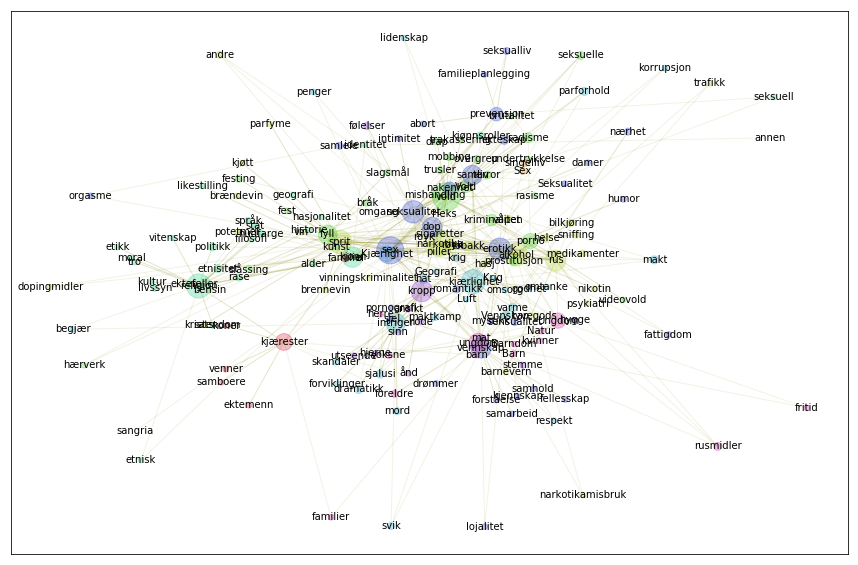

In [164]:
gnl.show_graph(Gsex, spread=0.8)

In [160]:
gnl.community_dict(Gsex)

{'narkotika-sprit': ['narkotika',
  'sprit',
  'alkohol',
  'rus',
  'tobakk',
  'røyk',
  'sigaretter',
  'piller',
  'helse',
  'våpen',
  'bilkjøring',
  'øl',
  'medikamenter',
  'andre',
  'hasj',
  'narkotikamisbruk',
  'parfyme',
  'vinningskriminalitet',
  'royk',
  'psykiatri',
  'sats',
  'kjøtt',
  'barnevern',
  'brennevin',
  'dopingmidler',
  'bensin',
  'trafikk',
  'tyvegods',
  'vin',
  'nikotin',
  'brændevin',
  'potetmel',
  'sniffing'],
 'vold-sex': ['vold',
  'sex',
  'dop',
  'fyll',
  'porno',
  'nakenhet',
  'Vold',
  'kriminalitet',
  'sadisme',
  'prostitusjon',
  'terror',
  'seksuelle',
  'bråk',
  'samleie',
  'overgrep',
  'slåssing',
  'drap',
  'festing',
  'mobbing',
  'trusler',
  'damer',
  'slagsmål',
  'trakassering',
  'undertrykkelse',
  'orgasme',
  'videovold',
  'mishandling',
  'brutalitet',
  'hærverk',
  'rasisme',
  'fest',
  'sangria',
  'Heks',
  'omgang',
  'annen'],
 'religion-kjønn': ['religion',
  'kjønn',
  'etnisitet',
  'politikk'

In [153]:
for x in map(nb.word_paradigm, sex):
    print(x)

[['adj', ['voldende', 'voldt', 'voldte']], ['subs', ['vold', 'volden', 'voldene', 'volder']], ['verb', ['vold', 'volde', 'volder', 'voldes', 'voldt', 'voldte']]]
[['subs', ['sex', 'sexen', 'sexene', 'sexer']]]
[['subs', ['narkotika', 'narkotikaen', 'narkotikaene', 'narkotikaer', 'narkotikum', 'narkotikumet']]]
[['adj', ['rusa', 'rusede', 'rusende', 'ruset', 'rusete', 'rust', 'ruste']], ['subs', ['rus', 'rusa', 'rusen', 'rusene', 'ruser', 'ruset']], ['verb', ['rus', 'rusa', 'ruse', 'ruser', 'ruses', 'ruset', 'rust', 'ruste']]]
[['adj', ['dopa', 'dopede', 'dopende', 'dopet', 'dopete']], ['subs', ['dop', 'dopa', 'dopen', 'dopene', 'doper', 'dopet']], ['verb', ['dop', 'dopa', 'dope', 'doper', 'dopes', 'dopet']]]
[['subs', ['alkohol', 'alkoholen', 'alkoholene', 'alkoholer']]]
[['subs', ['seksualitet', 'seksualiteten', 'seksualitetene', 'seksualiteter']]]
[['subs', ['porno', 'pornoen', 'pornoene', 'pornoer']]]
[['subs', ['kriminalitet', 'kriminaliteten', 'kriminalitetene', 'kriminaliteter']]

Starter med å finne alle bøkene av Agnar Mykle:

In [26]:
finn_bok('Mykle')

,urn,forfatter,år,tittel,forlag,språk,trans
33,2015090129001,"Mykle, Agnar",1956.0,Sangen om den røde rubin,Gyldendal,nob,
50,2011112308125,"Mykle, Agnar",1954.0,Lasso rundt fru Luna,Gyldendal,nob,
171,2011111608114,"Mykle, Agnar",1951.0,"Tyven, tyven skal du hete",Tiden,nob,


Kopierer URN-en for rubinen, og plotter med ordene i `tronds`. Boktittel og forfatter kommer opp i diagramtittelen.

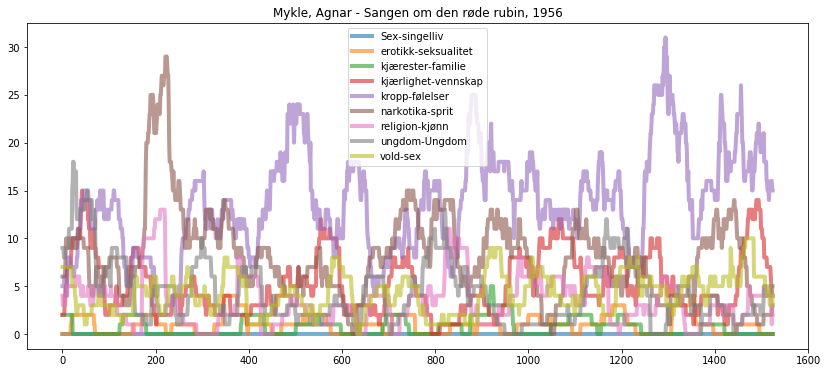

In [161]:
vekstplot(2015090129001, gnl.community_dict(Gsex));

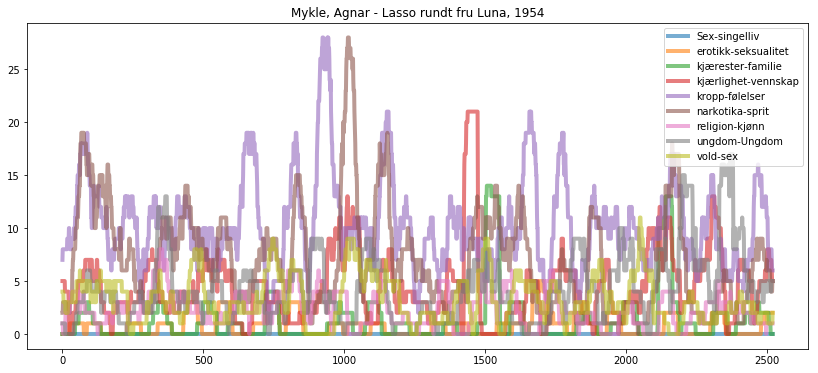

In [162]:
vekstplot(2011112308125,gnl.community_dict(Gsex));

In [29]:
finn_bok('Bjørg')

,urn,forfatter,år,tittel,forlag,språk,trans
19,2007072501029,"Vik, Bjørg",1970.0,Gråt elskede mann,Cappelen,nob,
169,2007050401037,"Vik, Bjørg",1968.0,Det grådige hjerte,Cappelen,nob,


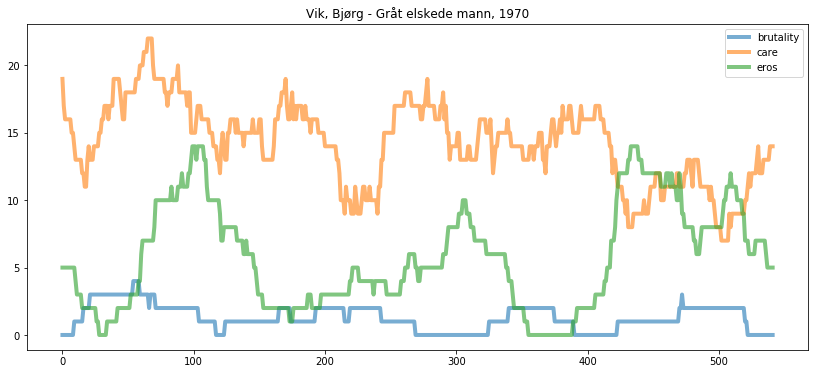

In [30]:
vekstplot(2007072501029, tronds)

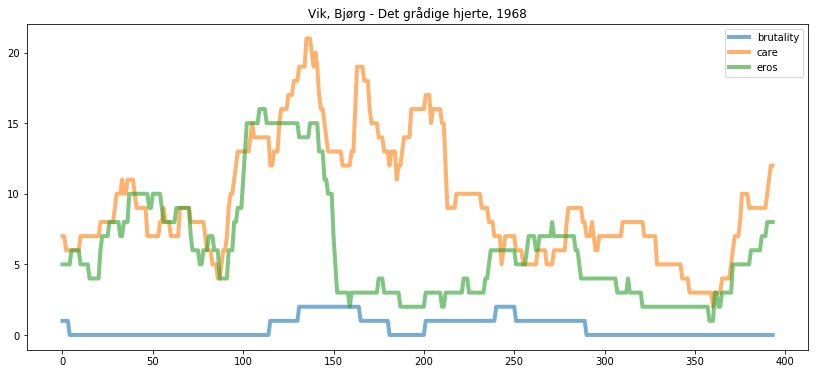

In [31]:
vekstplot(2007050401037, tronds)

In [32]:
finn_bok('Masterson')

,urn,forfatter,år,tittel,forlag,språk,trans
0,2013042508137,"Masterson, Louis",1969.0,Coyotéros,Bladkompaniet,nob,
79,2013053008089,"Masterson, Louis",1969.0,Apache!,Bladkompaniet,nob,
88,2013042338044,"Masterson, Louis",1967.0,rangers ære,Bladkompaniet,nob,
119,2013053008119,"Masterson, Louis",1970.0,Dødsklokkene,Bladkompaniet,nob,
193,2013053008091,"Masterson, Louis",1969.0,Blod og gull,Bladkompaniet,nob,


In [148]:
finn_bok('Bjørneboe')

,urn,forfatter,år,tittel,forlag,språk,trans
16,2013040824045,"Bjørneboe, Jens",1966.0,Uten en tråd,Scala forl.,nob,
77,2013042427001,"Bjørneboe, Jens",1968.0,Uden en trævl,Stig Vendelkærs Forlag,dan,
85,2011102508229,"Bjørneboe, Sven Kærup",1970.0,Keiserinnens nye klær,IBA;Scala,nob,
100,2007072604023,"Bjørneboe, Jens",1969.0,Kruttårnet,Gyldendal,nob,


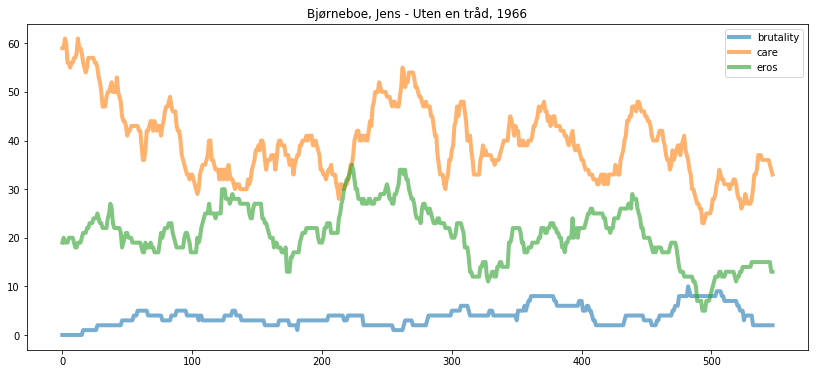

In [149]:
vekstplot(2013040824045,tronds)

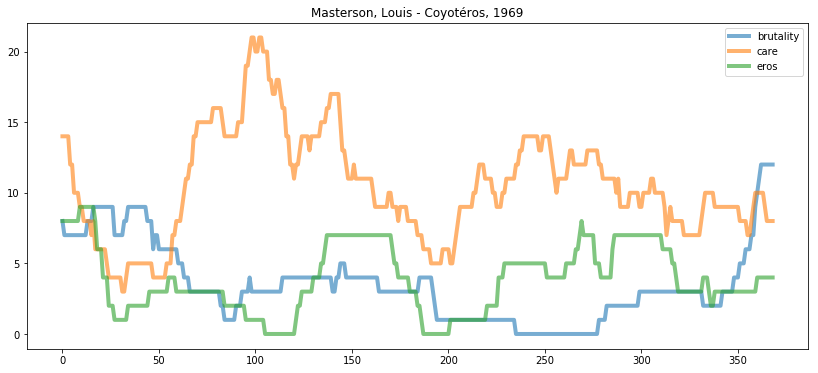

In [34]:
vekstplot(2013042508137,tronds)

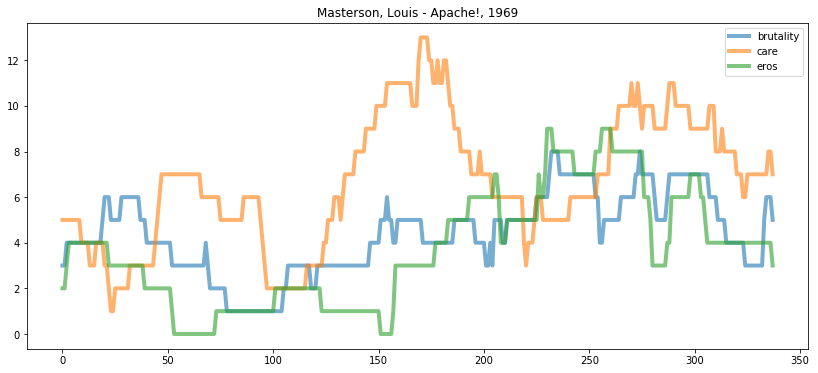

In [35]:
vekstplot(2013053008089,tronds)

In [37]:
finn_bok('ung','tittel')

,urn,forfatter,år,tittel,forlag,språk,trans
5,2011120208258,"Halevy, Julian",1956.0,De unge elskende,Gyldendal,nob,eng


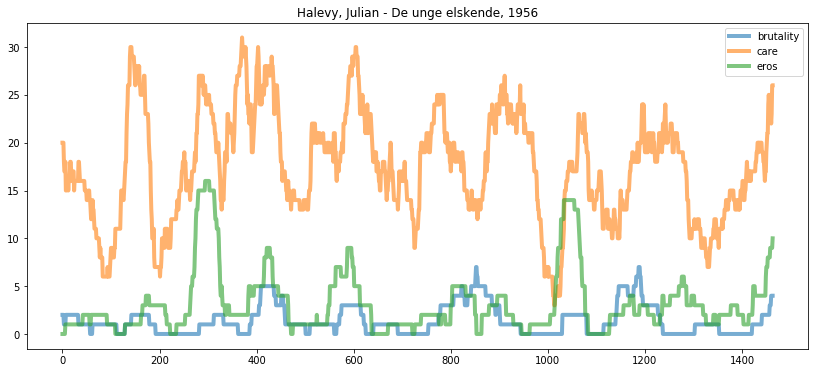

In [38]:
vekstplot(2011120208258,tronds)

URNene finner du ved å bruke `finn_bok` som i et par celler over.

In [39]:
finn_bok('Bladkompaniet', 'forlag')

,urn,forfatter,år,tittel,forlag,språk,trans
0,2013042508137,"Masterson, Louis",1969.0,Coyotéros,Bladkompaniet,nob,
7,2013041608006,"Mair, George B.",1967.0,"Lev, elsk og dø!",Bladkompaniet,nob,eng
27,2013052908048,"Croudace, Glynn",1969.0,Afrikas blod,Bladkompaniet,nob,eng
32,2013042408069,"Weil, Jerry",1965.0,Uro i blodet,Bladkompaniet,nob,eng
38,2013042508013,"Trolle, Elsa af",1953.0,Livets flamme,Bladkompaniet,nob,swe
39,2013042508122,,1967.0,Piken på bussen,Bladkompaniet,nob,eng
48,2013041908061,,1969.0,Norsk Decamerone,Bladkompaniet,nob,
56,2013041908060,"Beaty, David",1968.0,Kjærligheten lokker,Bladkompaniet,nob,eng
59,2013060408147,"Brett, John Michael",1969.0,Hakekorsets skygge,Bladkompaniet,nob,eng
64,2013041608024,"St. John, David",1969.0,Mannen fra C.I.A,Bladkompaniet,nob,eng


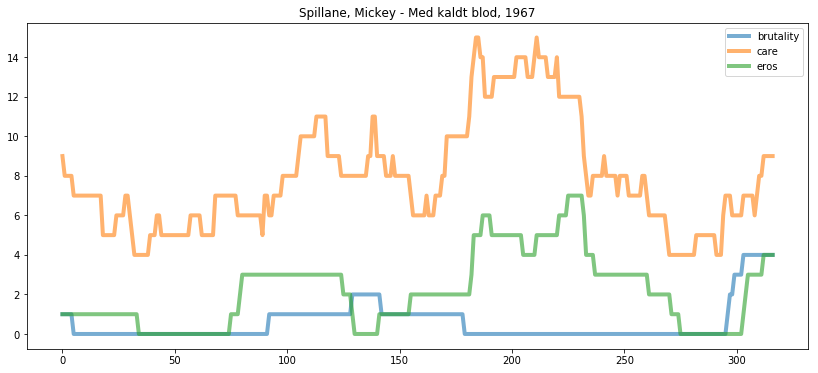

In [40]:
vekstplot(2013041908081, tronds)

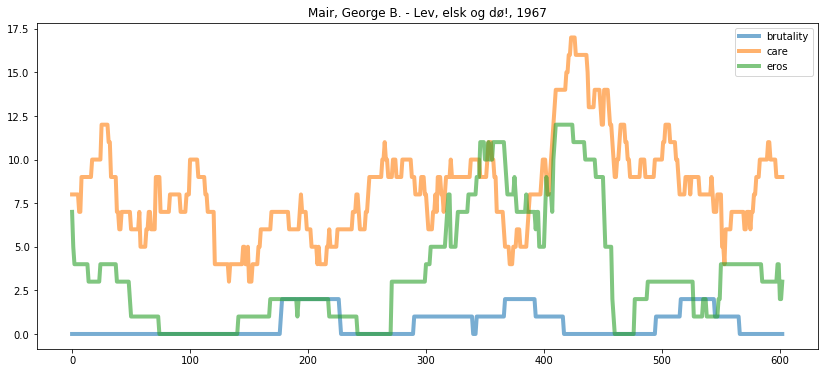

In [41]:
vekstplot(2013041608006, tronds)

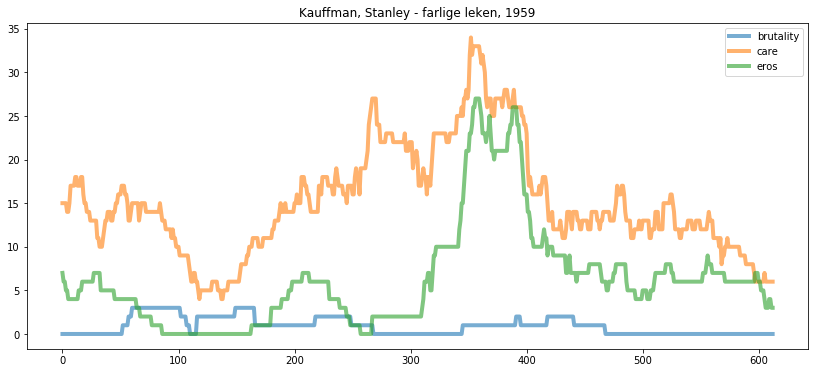

In [147]:
vekstplot(2013042508081, tronds)

In [43]:
def vekstdata(x, words):
    #m = nb.metadata(x)
    df = nb.plot_sammen_vekst(x,words)
    result = dict(df.sum(axis=0))
    return result

In [44]:
vekstdata(2013042508081, tronds)

{'brutality': 550.0, 'care': 9294.0, 'eros': 3819.0}

In [45]:
sums = dict()
for u in urns:
    try:
        sums[u] = vekstdata(u, tronds)
    except Exception as e:
        print(u, e)

2017031748088 Expecting value: line 1 column 1 (char 0)
2017061908121 Expecting value: line 1 column 1 (char 0)
2017061608118 Expecting value: line 1 column 1 (char 0)
2017061908019 Expecting value: line 1 column 1 (char 0)
2017051548195 Expecting value: line 1 column 1 (char 0)
2017051648037 Expecting value: line 1 column 1 (char 0)
2016113008067 Expecting value: line 1 column 1 (char 0)
2017080248038 Expecting value: line 1 column 1 (char 0)
2017060708009 Expecting value: line 1 column 1 (char 0)
2017100348072 Expecting value: line 1 column 1 (char 0)
2016112408030 Expecting value: line 1 column 1 (char 0)
2017100348053 Expecting value: line 1 column 1 (char 0)
2017051148150 Expecting value: line 1 column 1 (char 0)
2017061608174 Expecting value: line 1 column 1 (char 0)
2017051548112 Expecting value: line 1 column 1 (char 0)
2017020808195 Expecting value: line 1 column 1 (char 0)
2017060708012 Expecting value: line 1 column 1 (char 0)
2017060708029 Expecting value: line 1 column 1 (

2017051548101 Expecting value: line 1 column 1 (char 0)
2017032148027 Expecting value: line 1 column 1 (char 0)
2017062108053 Expecting value: line 1 column 1 (char 0)
2017061908093 Expecting value: line 1 column 1 (char 0)
2017051548097 Expecting value: line 1 column 1 (char 0)
2017061908003 Expecting value: line 1 column 1 (char 0)
2017051648038 Expecting value: line 1 column 1 (char 0)
2017032708038 Expecting value: line 1 column 1 (char 0)
2017051548109 Expecting value: line 1 column 1 (char 0)
2017061908016 Expecting value: line 1 column 1 (char 0)
2017051548056 Expecting value: line 1 column 1 (char 0)
2017061908065 Expecting value: line 1 column 1 (char 0)
2017061908137 Expecting value: line 1 column 1 (char 0)
2017061248086 Expecting value: line 1 column 1 (char 0)
2017021708016 Expecting value: line 1 column 1 (char 0)
2017051548038 Expecting value: line 1 column 1 (char 0)
2017051548045 Expecting value: line 1 column 1 (char 0)
2017051548106 Expecting value: line 1 column 1 (

In [46]:
sums

{'2013042508137': {'brutality': 1301.0, 'care': 3867.0, 'eros': 1431.0},
 '2013112808193': {'brutality': 564.0, 'care': 2453.0, 'eros': 1049.0},
 '2015072308367': {'brutality': 549.0, 'care': 3174.0, 'eros': 1912.0},
 '2012011208116': {'brutality': 642.0, 'care': 5101.0, 'eros': 696.0},
 '2012010508114': {'brutality': 828.0, 'care': 7246.0, 'eros': 2024.0},
 '2011120208258': {'brutality': 2063.0, 'care': 25656.0, 'eros': 4636.0},
 '2007080801042': {'brutality': 1811.0, 'care': 12269.0, 'eros': 2096.0},
 '2013041608006': {'brutality': 350.0, 'care': 5000.0, 'eros': 2116.0},
 '2007043004019': {'brutality': 2155.0, 'care': 17218.0, 'eros': 3594.0},
 '2007041101088': {'brutality': 453.0, 'care': 5025.0, 'eros': 2535.0},
 '2007032701087': {'brutality': 1363.0, 'care': 13845.0, 'eros': 3905.0},
 '2016110248105': {'brutality': 743.0, 'care': 11022.0, 'eros': 1852.0},
 '2007050404028': {'brutality': 1006.0, 'care': 10157.0, 'eros': 2161.0},
 '2008052300020': {'brutality': 400.0, 'care': 701.0,

In [47]:
dfsums = nb.frame(sums)

In [55]:
dfsums

,brutality,care,eros
2007022301059,0.003779,0.003395,0.002247
2007030501021,0.002713,0.001954,0.003985
2007030701025,0.001402,0.002897,0.001312
2007030701037,0.004722,0.003927,0.003744
2007030701052,0.002980,0.001120,0.000911
2007030801106,0.002892,0.003039,0.004949
2007032601076,0.003618,0.006159,0.005335
2007032701087,0.004778,0.007702,0.006030
2007041101088,0.001588,0.002796,0.003914
2007041601016,0.001052,0.002700,0.003544


In [48]:
# i og med at det tar litt tid, så lagres

with open('sums.json','w') as f:
    f.write(dfsums.to_json())

In [107]:
def normalize_corpus_dataframe(df, axis=1):
    axis_sum = df.sum(axis = axis)
    for x in df.index:
        #print(x)
        df.loc[x] = df.loc[x].fillna(0)/axis_sum.loc[x]
    return True

In [108]:
normalize_corpus_dataframe(dfsums)

True

In [109]:
dfsums

,brutality,care,eros
2007022301059,0.401164,0.360355,0.238481
2007030501021,0.313601,0.225812,0.460587
2007030701025,0.249868,0.516271,0.233861
2007030701037,0.381034,0.316835,0.302131
2007030701052,0.594693,0.223498,0.181808
2007030801106,0.265825,0.279337,0.454838
2007032601076,0.239409,0.407572,0.353018
2007032701087,0.258143,0.416115,0.325742
2007041101088,0.191386,0.336902,0.471712
2007041601016,0.144154,0.370136,0.485709


In [73]:
subsets = lambda f: [str(x) for x in set(bokinfo[bokinfo['forlag']==f]['urn']) & {int(x) for x in dfsums.index}]

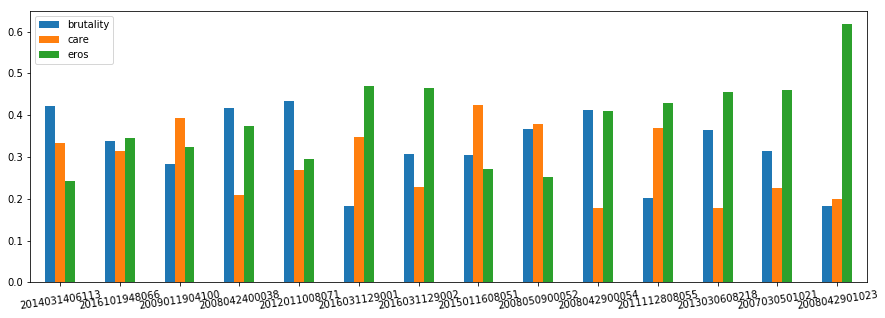

In [110]:
dfsums.loc[subsets('Brann')].plot(figsize=(15,5), kind='bar', rot  = 8)

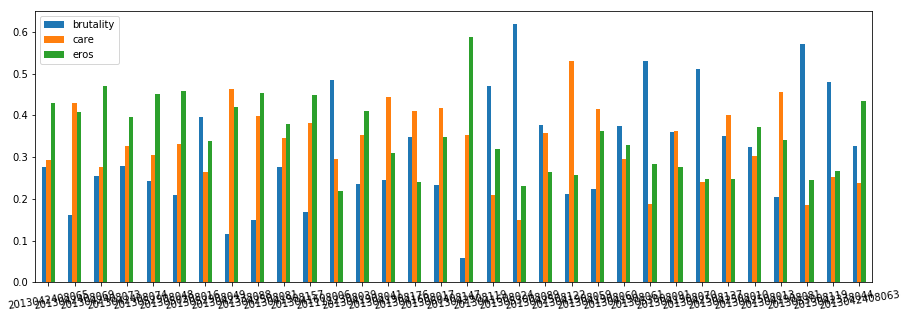

In [145]:
dfsums.loc[subsets('Bladkompaniet')].plot(figsize=(15,5), kind='bar', rot  = 8)

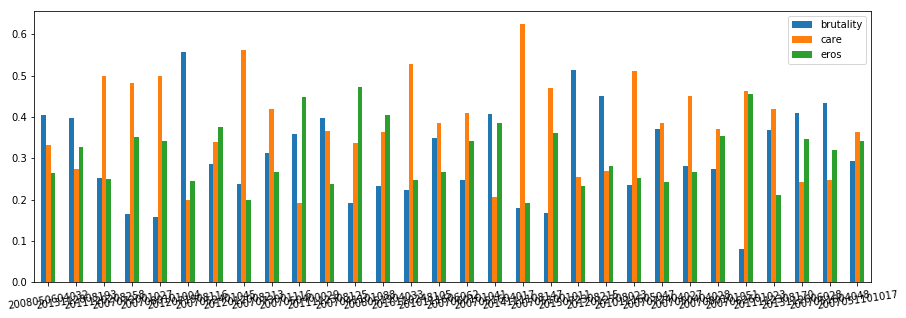

In [146]:
dfsums.loc[subsets('Gyldendal')[:30]].plot(figsize=(15,5), kind='bar', rot  = 8)

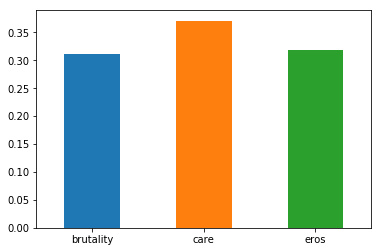

In [113]:
dfsums.loc[subsets('Gyldendal')].mean(axis=0).plot(kind='bar', rot=0)

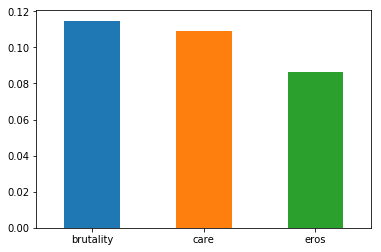

In [114]:
dfsums.loc[subsets('Gyldendal')].std(axis=0).plot(kind='bar', rot=0)

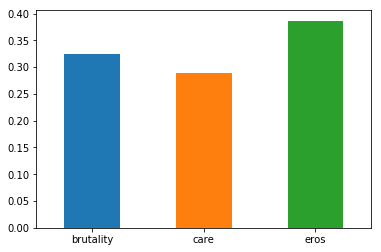

In [115]:
dfsums.loc[subsets('Brann')].mean(axis=0).plot(kind='bar', rot=0)

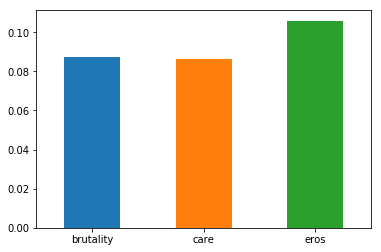

In [116]:
dfsums.loc[subsets('Brann')].std(axis=0).plot(kind='bar', rot=0)

In [117]:
dfsums.loc[subsets('Brann')].mean(axis=0)

brutality    0.323669
care         0.289613
eros         0.386718
dtype: float64

In [118]:
dfsums.loc[subsets('Brann')].std(axis=0)

brutality    0.087491
care         0.086423
eros         0.105865
dtype: float64

In [119]:
dfsums.loc[subsets('Gyldendal')].mean(axis=0)

brutality    0.311209
care         0.370914
eros         0.317877
dtype: float64

In [122]:
dict(dfsums.loc[subsets('Gyldendal')].std(axis=0))

{'brutality': 0.11480370160859175,
 'care': 0.10884587614643242,
 'eros': 0.08639488924699618}

In [121]:
import numpy as np

In [140]:
def forlag(f1, f2, key):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.mlab as mlab
    import math

    mu1 = dfsums.loc[subsets(f1)].mean(axis=0)[key]
    mu2 = dfsums.loc[subsets(f2)].mean(axis=0)[key]
    sigma1 = dfsums.loc[subsets(f1)].std(axis=0)[key]
    sigma2 = dfsums.loc[subsets(f2)].std(axis=0)[key]
    x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
    x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
    plt.plot(x1, mlab.normpdf(x1, mu1, sigma1))
    plt.plot(x2 ,mlab.normpdf(x2, mu2, sigma2))
    plt.show()

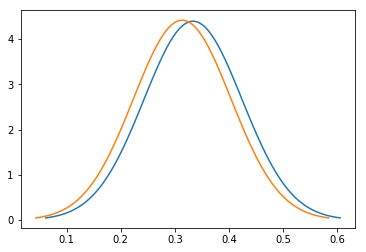

In [142]:
forlag('Bladkompaniet', 'Aschehoug','care')

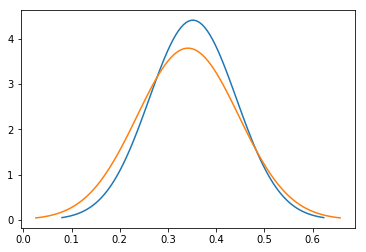

In [143]:
forlag('Bladkompaniet', 'Aschehoug','eros')

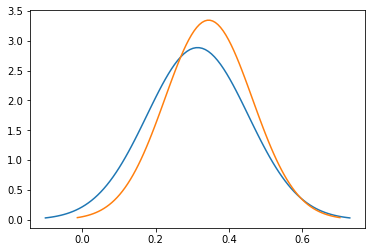

In [144]:
forlag('Bladkompaniet', 'Aschehoug','brutality')